<ipython-input-4-3f48fc833e91>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('flow.jpeg', mode='L')


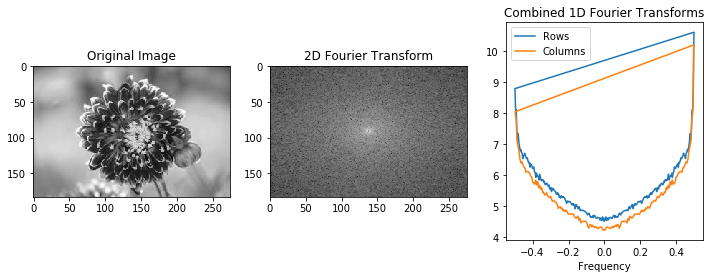

In [4]:
import numpy as np
import imageio
from scipy import fftpack
import matplotlib.pyplot as plt

# Read the image
image = imageio.imread('flow.jpeg', mode='L')

# Perform 2D Fourier Transform
fft2d = fftpack.fftshift(fftpack.fft2(image))

# Compute the magnitude spectrum for 2D FFT
magnitude_spectrum_2d = np.log(np.abs(fft2d) + 1)

# Display the results
plt.figure(figsize=(12, 4))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# 2D Fourier Transform
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum_2d, cmap='gray')
plt.title('2D Fourier Transform')

# Combined 1D Fourier Transforms along rows and columns
plt.subplot(1, 3, 3)
row_fft = np.log(np.abs(fftpack.fftshift(fftpack.fft(image, axis=1))).mean(axis=0) + 1)
col_fft = np.log(np.abs(fftpack.fftshift(fftpack.fft(image, axis=0))).mean(axis=1) + 1)
plt.plot(np.fft.fftfreq(image.shape[1]), row_fft, label='Rows')
plt.plot(np.fft.fftfreq(image.shape[0]), col_fft, label='Columns')
plt.title('Combined 1D Fourier Transforms')
plt.xlabel('Frequency')
plt.legend()

plt.show()
